## Color Identification in Images

#### Load Libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import cv2
import os
import scipy.spatial.distance as dist
from PIL import Image

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
% cd 'drive/MyDrive/GRIP CV'

/content/drive/MyDrive/GRIP CV


#### Functions for loading image

In [ ]:
def open_image(path):
    image = Image.open(path)
    return image

In [ ]:
def display_image(image):
    plt.imshow(image)
    plt.axis('off')

In [ ]:
def RGBtoHEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### Obtaining colors from image 

In [ ]:
def get_colors(image, number_of_colors, show_chart):

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGBtoHEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        explode = [0.05 for i in range(len(hex_colors))]
        fig1, ax1 = plt.subplots()
        ax1.pie(counts.values(), labels = hex_colors, colors = hex_colors, pctdistance = 0.85, explode = explode)
        centre_circle = plt.Circle((0,0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
        ax1.axis('equal')  
        plt.tight_layout()
        plt.show()
           
    return rgb_colors

#### Plot for locating extracted colors in image 

In [ ]:
def show_colors_in_image(image_array, rgb_color, threshold):
    white_image = np.zeros((image_array.shape), dtype=int)
    color = np.zeros((image_array.shape), dtype=int)
    for i in range(image_array.shape[0]):
        if dist.euclidean(image_array[i], rgb_color) <= threshold:
            white_image[i] = image_array[i]
        else:
            white_image[i] = [255, 255, 255]
        color[i] = rgb_color
    return white_image, color     

In [ ]:
def make_plot(image_array, rgb_colors, height, width, plots):
    plt.figure(figsize=(20, 15))
    for i in range(1,plots*3+1):
        ax = plt.subplot(5, 6, i)
        if i%3 == 1:
            white_image, color = show_colors_in_image(image_array, rgb_colors[i//3], 40)
            plt.imshow(image_array.reshape(height, width, 3))
            plt.title('Original Image')
        if i%3 == 2:
            plt.imshow(white_image.reshape(height, width, 3))
            plt.title('Color in Image')
        if i%3 ==0:
            plt.imshow(color.reshape(height, width, 3))
            plt.title('Color')
        plt.axis("off")
        plt.tight_layout(pad=2.0)

#### Extraction of colors from Image

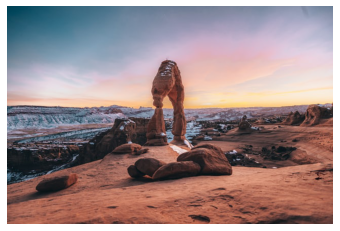

In [ ]:
image = open_image('Images/image0.jpg')
display_image(image)
width, height = image.size

In [ ]:
image_array = np.array(list(image.getdata()))
image_array = image_array.reshape(width * height, 3)

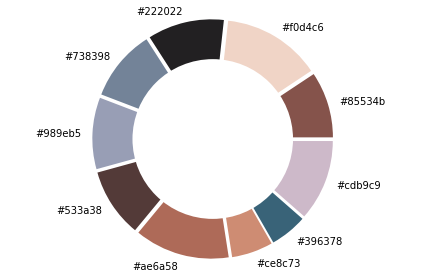

In [ ]:
rgb_colors = get_colors(image_array, 10, True)

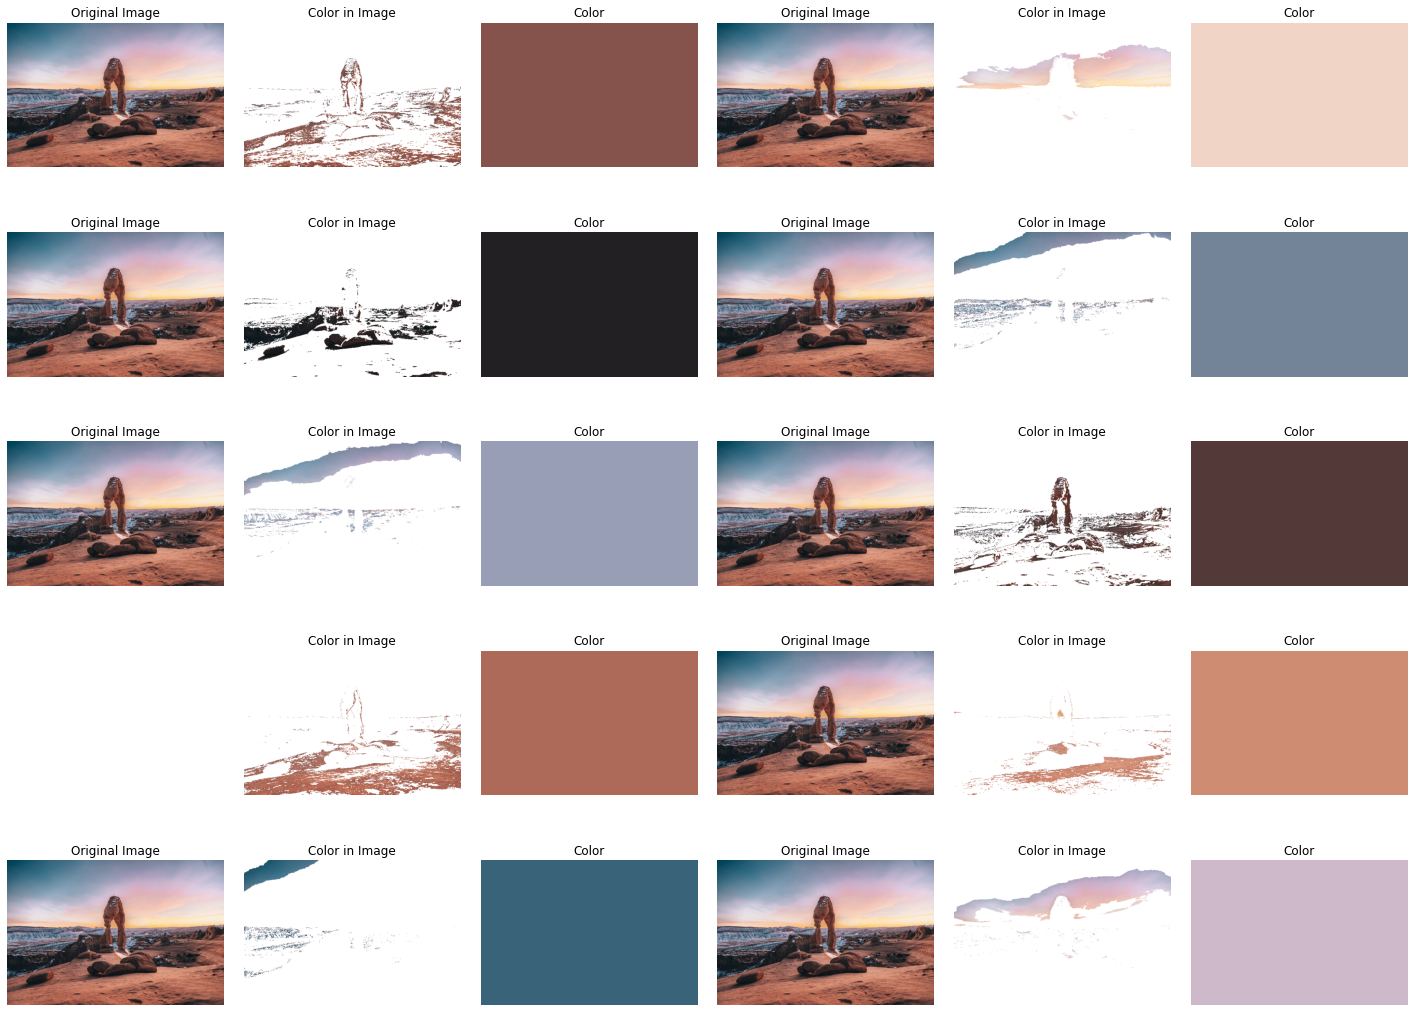

In [ ]:
make_plot(image_array, rgb_colors, height, width, 10)

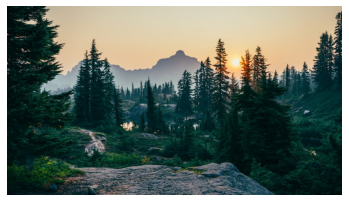

In [ ]:
image = open_image('Images/image5.jpg')
display_image(image)
width, height = image.size
image_array = np.array(list(image.getdata()))
image_array = image_array.reshape(width * height, 3)

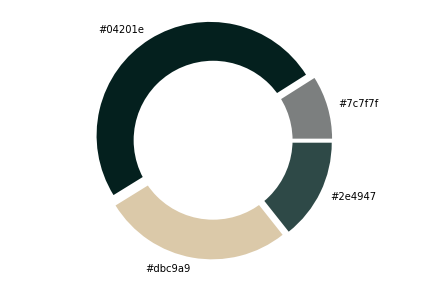

In [ ]:
rgb_colors = get_colors(image_array, 4, True)

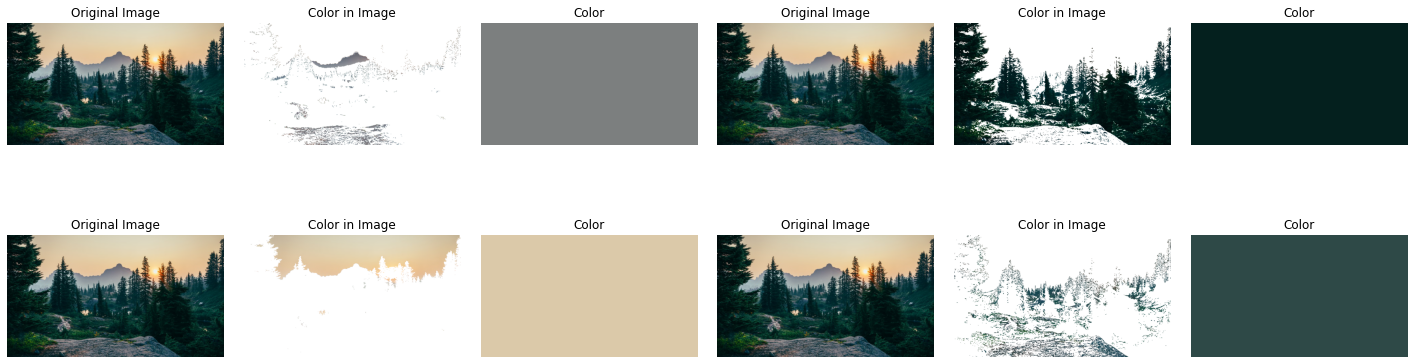

In [ ]:
make_plot(image_array, rgb_colors, height, width, 4)

#### Extracting similar colors from Images

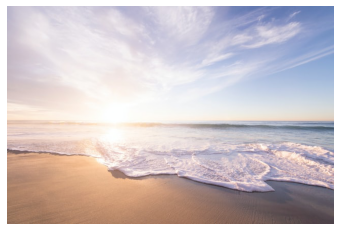

In [ ]:
image = open_image('Images/image4.jpg')
display_image(image)
width, height = image.size
image_array = np.array(list(image.getdata()))
image_array = image_array.reshape(width * height, 3)

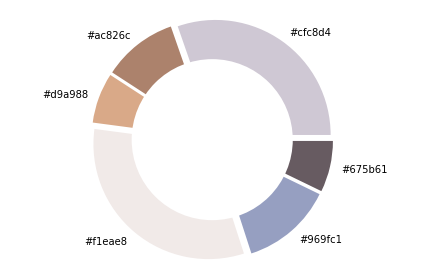

In [ ]:
rgb_colors = get_colors(image_array, 6, True)

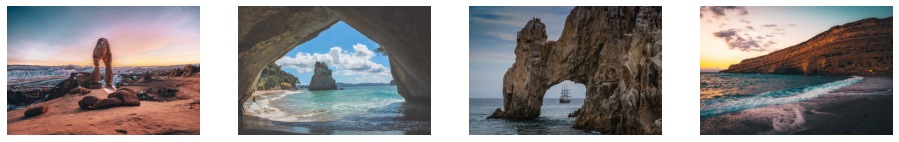

In [ ]:
images = []
for i in range(4):
    images.append(open_image('Images/image{}.jpg'.format(i)))

plt.figure(figsize=(20, 15))
for i in range(1,5):
    ax = plt.subplot(1, 5, i)
    plt.imshow(images[i-1])
    plt.axis('off')

In [ ]:
def compare_colors(rgb_colors, threshold, image):
    width, height = image.size
    display_image(image)
    image_array = np.array(list(image.getdata()))
    image_array = image_array.reshape(width * height, 3)
    white_images, colors = [], []
    image_array
        
    for color in range(len(rgb_colors)):
        white_image = np.zeros((image_array.shape), dtype=int)
        color_image = np.zeros((image_array.shape), dtype=int)
        for i in range(image_array.shape[0]):
            if dist.euclidean(image_array[i], rgb_colors[color]) <= threshold:
                white_image[i] = image_array[i]
            else:
                white_image[i] = [255, 255, 255]
            color_image[i] = rgb_colors[color]
        white_images.append(white_image)
        colors.append(color_image)
    return white_images, colors     

In [ ]:
def plot(image, rgb_colors):
    plt.figure(figsize=(20, 15))
    for i in range(1,8):
        ax = plt.subplot(1, 7, i)
        if i%7 == 1:
            white_images, colors = compare_colors(rgb_colors, 50, image)
            ctr = 0
            plt.imshow(image)
            plt.title('Image')
        else:
            plt.imshow(white_images[ctr].reshape(427, 640, 3))
            plt.title(RGBtoHEX(rgb_colors[ctr]))
            ctr = ctr + 1
        plt.axis("off")
        plt.tight_layout(pad=2.0)

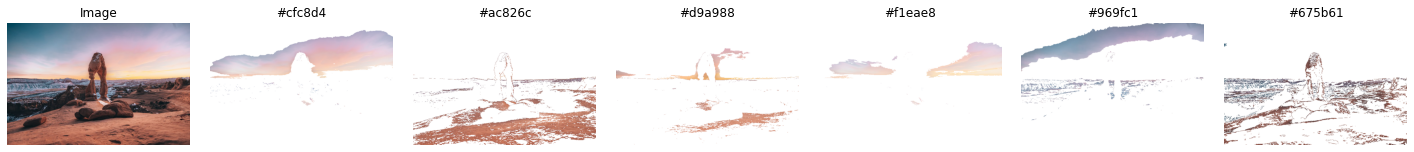

In [ ]:
plot(images[0], rgb_colors)

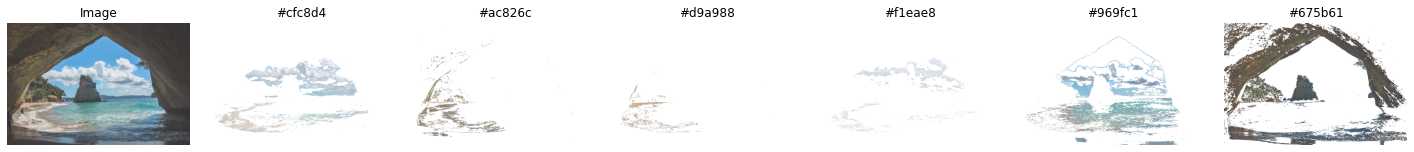

In [ ]:
plot(images[1], rgb_colors)

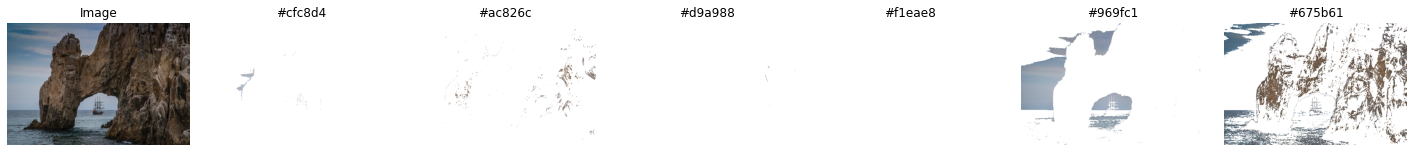

In [ ]:
plot(images[2], rgb_colors)

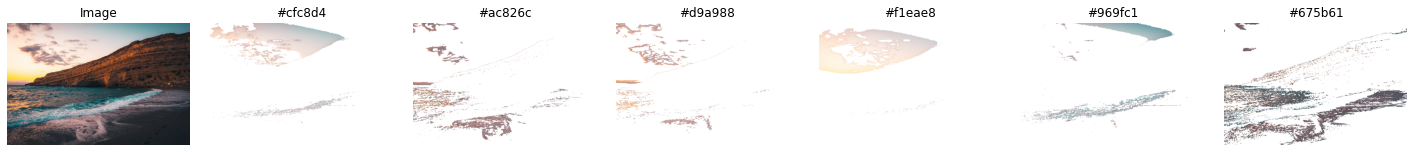

In [ ]:
plot(images[3], rgb_colors)